### Loading the Dataset


In [1]:
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata


In [2]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
#print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 

           name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feature  Categ

In [3]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [4]:
#y = y.replace({1: 0, 2: 1})
y = y -1
y.head()

,class
0,0
1,1
2,0
3,0
4,1


In [5]:
# Descriptive statistics for features
print(X.describe())

# Frequency of categories for categorical features
for column in X.select_dtypes(include=['object']).columns:
    print(f"\nFrequency of categories in {column}:")
    print(X[column].value_counts())

# Target variable distribution
print("\nTarget Variable Distribution:")
print(y.value_counts())


        Attribute2    Attribute5   Attribute8  Attribute11  Attribute13  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     20.903000   3271.258000     2.973000     2.845000    35.546000   
std      12.058814   2822.736876     1.118715     1.103718    11.375469   
min       4.000000    250.000000     1.000000     1.000000    19.000000   
25%      12.000000   1365.500000     2.000000     2.000000    27.000000   
50%      18.000000   2319.500000     3.000000     3.000000    33.000000   
75%      24.000000   3972.250000     4.000000     4.000000    42.000000   
max      72.000000  18424.000000     4.000000     4.000000    75.000000   

       Attribute16  Attribute18  
count  1000.000000  1000.000000  
mean      1.407000     1.155000  
std       0.577654     0.362086  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       1.000000     1.000000  
75%       2.000000     1.000000  
max       4.000000     2.000000  

Frequency of cate

In [6]:
type(y)

pandas.core.frame.DataFrame

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming X is your features dataframe
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply label encoding
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col].iloc[:])


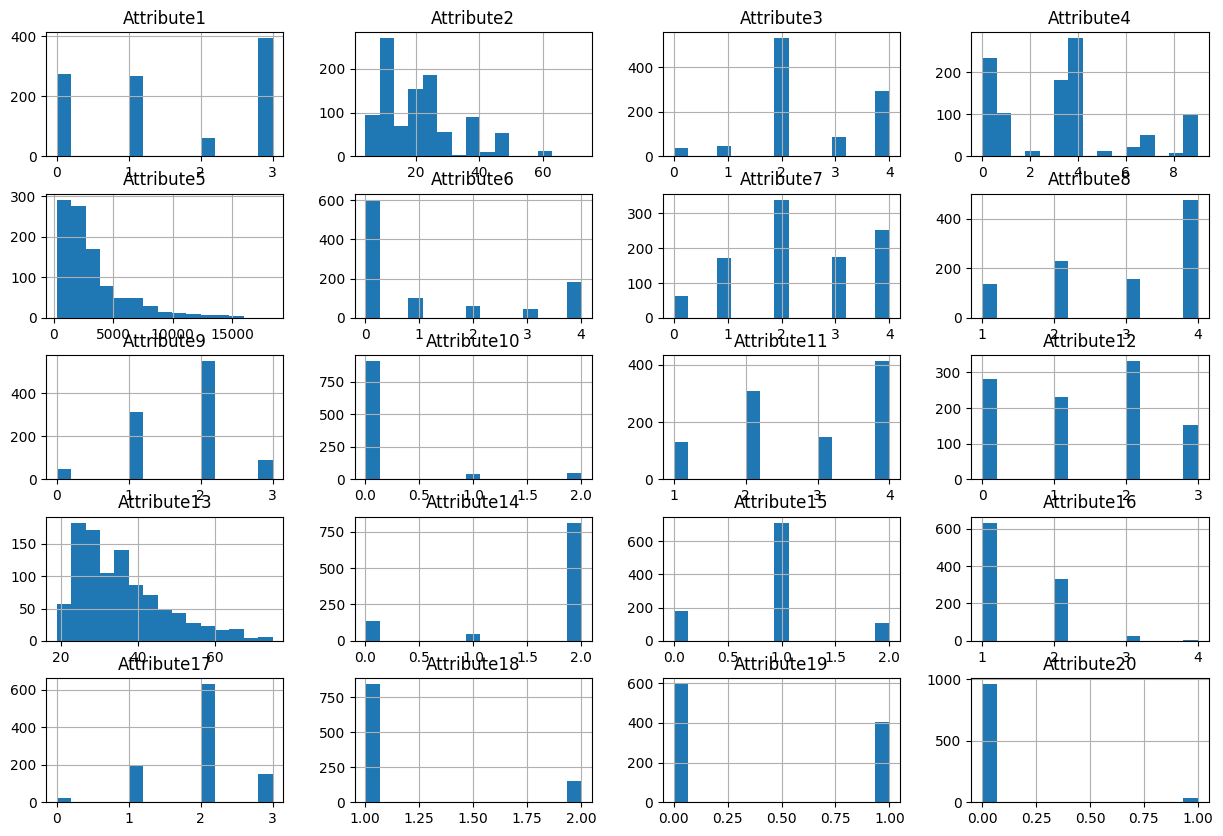

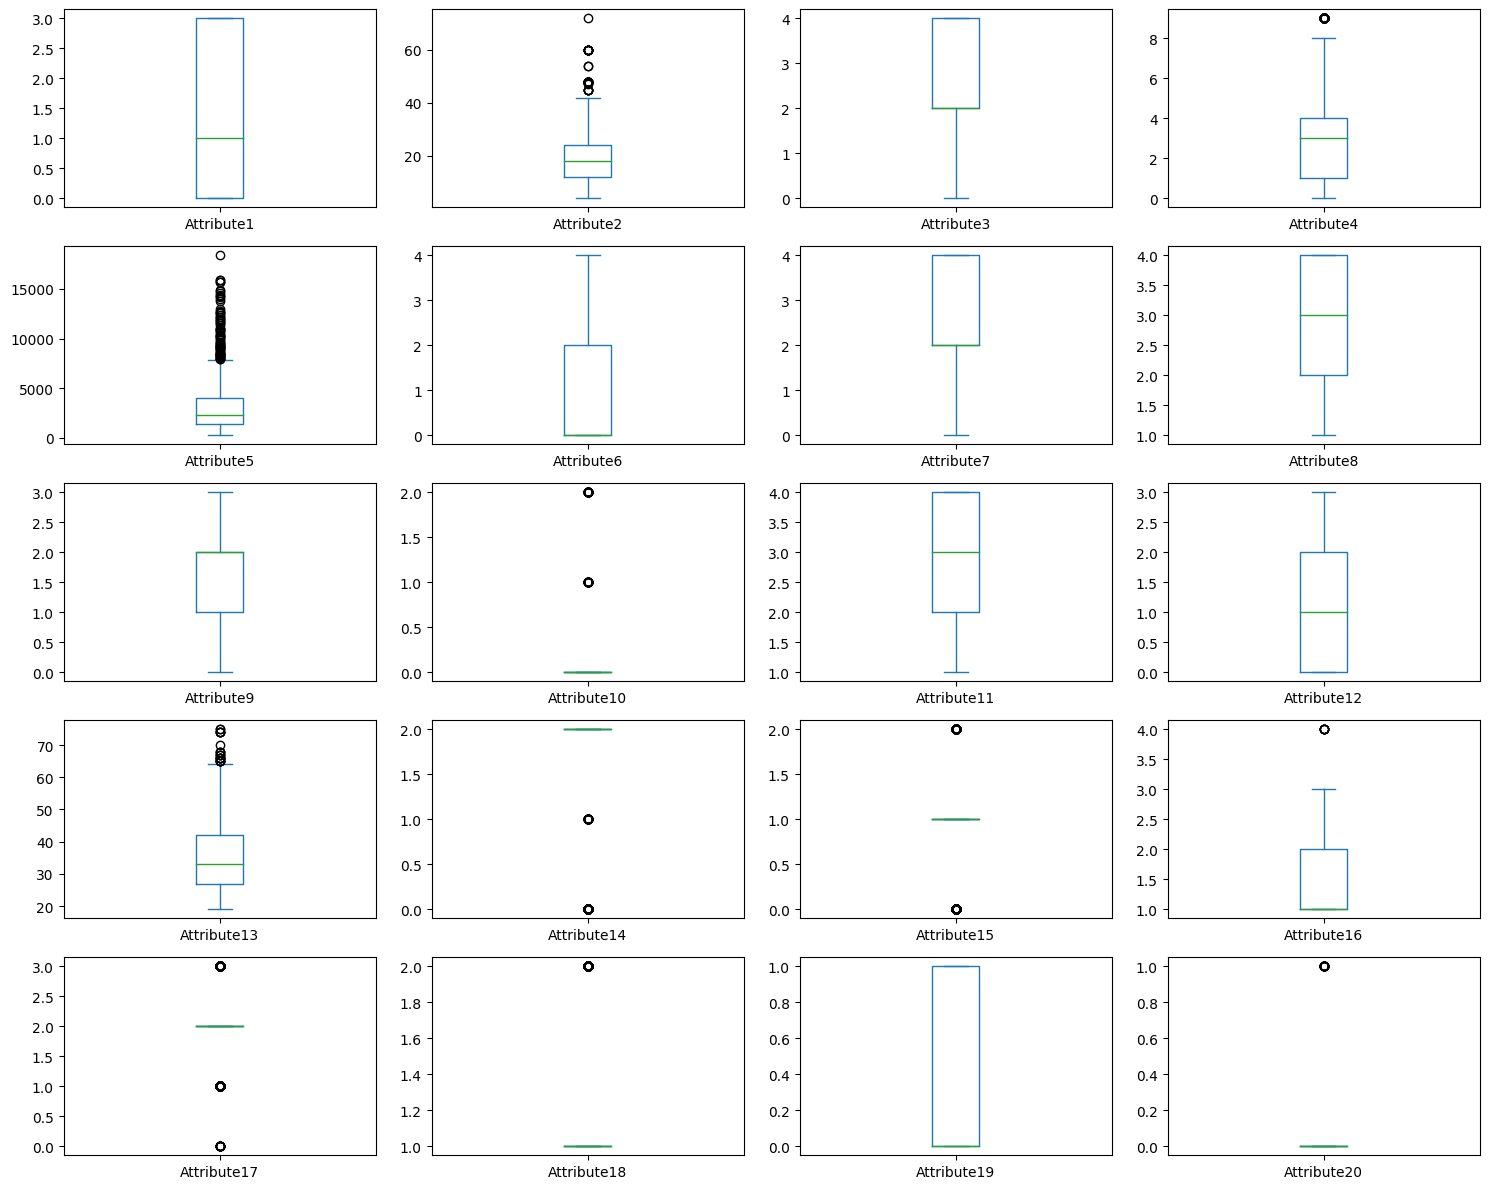

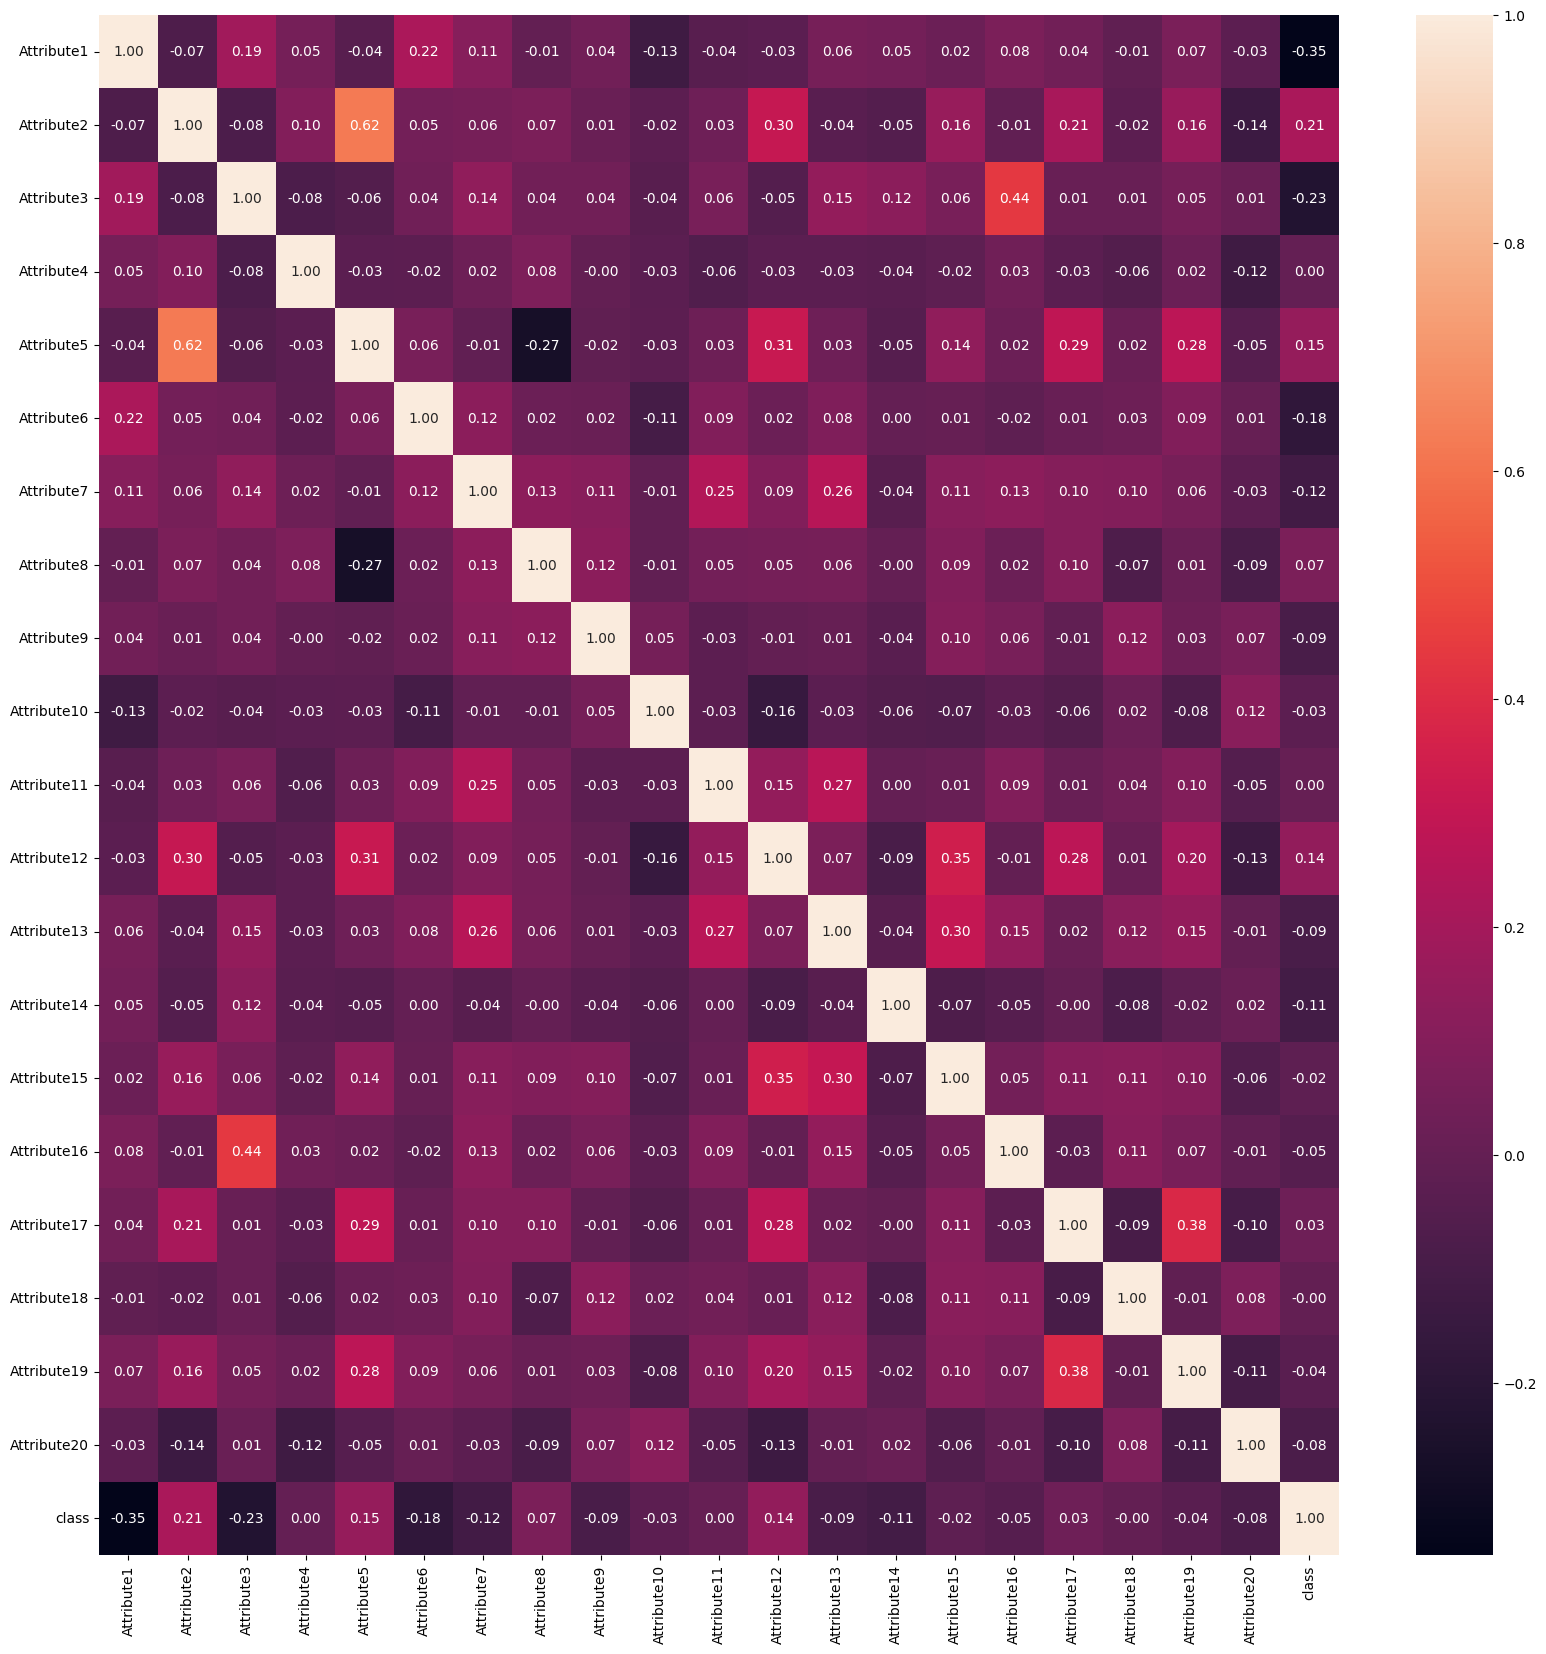

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

# Histograms for numerical data
X.hist(bins=15, figsize=(15, 10))
plt.show()

# Box plots for numerical data
X.plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 12))
plt.tight_layout()
plt.show()

# Correlation heatmap (combine X and y for this)
full_data = pd.concat([X, y], axis=1)
plt.figure(figsize=(20, 20))
sns.heatmap(full_data.corr(), annot=True, fmt=".2f")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from tqdm import tqdm

In [11]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

In [12]:
dtrain_reg = xgb.DMatrix(X_train,y_train,enable_categorical =True)
dtest_reg = xgb.DMatrix(X_test,y_test,enable_categorical =True)


[0]	validation_0-logloss:0.58595	validation_1-logloss:0.62390
[1]	validation_0-logloss:0.57124	validation_1-logloss:0.61411
[2]	validation_0-logloss:0.55770	validation_1-logloss:0.60665
[3]	validation_0-logloss:0.54489	validation_1-logloss:0.59923
[4]	validation_0-logloss:0.53313	validation_1-logloss:0.59204
[5]	validation_0-logloss:0.52228	validation_1-logloss:0.58533
[6]	validation_0-logloss:0.51179	validation_1-logloss:0.57956
[7]	validation_0-logloss:0.50244	validation_1-logloss:0.57400
[8]	validation_0-logloss:0.49219	validation_1-logloss:0.56908
[9]	validation_0-logloss:0.48200	validation_1-logloss:0.56409
[10]	validation_0-logloss:0.47371	validation_1-logloss:0.56050
[11]	validation_0-logloss:0.46415	validation_1-logloss:0.55716
[12]	validation_0-logloss:0.45692	validation_1-logloss:0.55344
[13]	validation_0-logloss:0.44847	validation_1-logloss:0.55044
[14]	validation_0-logloss:0.44050	validation_1-logloss:0.54749
[15]	validation_0-logloss:0.43305	validation_1-logloss:0.54486
[1

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-logloss:0.29029	validation_1-logloss:0.50828
[50]	validation_0-logloss:0.28788	validation_1-logloss:0.50738
[51]	validation_0-logloss:0.28537	validation_1-logloss:0.50738
[52]	validation_0-logloss:0.28306	validation_1-logloss:0.50753
[53]	validation_0-logloss:0.28082	validation_1-logloss:0.50702
[54]	validation_0-logloss:0.27724	validation_1-logloss:0.50731
[55]	validation_0-logloss:0.27463	validation_1-logloss:0.50611
[56]	validation_0-logloss:0.27258	validation_1-logloss:0.50533
[57]	validation_0-logloss:0.27018	validation_1-logloss:0.50447
[58]	validation_0-logloss:0.26804	validation_1-logloss:0.50394
[59]	validation_0-logloss:0.26538	validation_1-logloss:0.50372
[60]	validation_0-logloss:0.26312	validation_1-logloss:0.50397
[61]	validation_0-logloss:0.26053	validation_1-logloss:0.50358
[62]	validation_0-logloss:0.25847	validation_1-logloss:0.50380
[63]	validation_0-logloss:0.25610	validation_1-logloss:0.50303
[64]	validation_0-logloss:0.25425	validation_1-logloss:

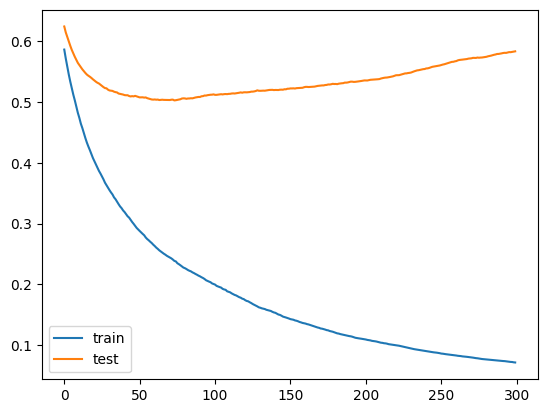

In [45]:

import xgboost as xgb
from matplotlib import pyplot
model = xgb.XGBClassifier(n_estimators=300, eta=0.05)
# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]
# fit the model
model.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
yhat = model.predict(X_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [16]:
def train_and_evaluate(X, y):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models with specified loss functions or criteria
    models = {
        "XGBoost": xgb.XGBClassifier(objective='binary:logistic',eval_metric='logloss',random_state=42),
        "Random Forest": RandomForestClassifier(criterion='gini'),
        "SVC": SVC(C=1.0, kernel='rbf'),
        "Neural Network": MLPClassifier(solver='adam'),
        "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l2')
    }

    # Dictionary to store performance metrics
    performance = {}

    # Train and evaluate each model
    for name, model in tqdm(models.items()):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        performance[name] = {'accuracy': accuracy, 'precision': precision}
    
    return performance


In [ ]:
y

In [17]:

performance = train_and_evaluate(X,y)

 20%|██        | 1/5 [00:00<00:00,  9.11it/s]/tmp/ipykernel_47/3063098646.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
 40%|████      | 2/5 [00:00<00:00,  4.20it/s]/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
 80%|████████  | 4/5 [00:00<00:00,  5.13it/s]/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: 

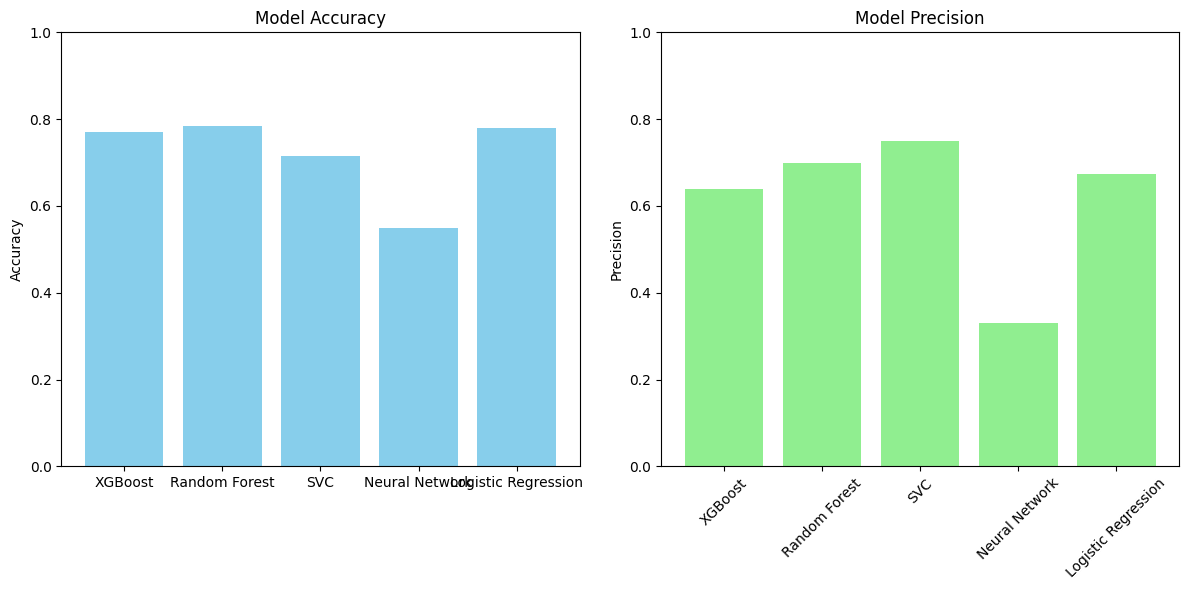

In [18]:
def plot_performance(performance):
    # Extracting model names, accuracies, and precisions
    models = list(performance.keys())
    accuracies = [performance[model]['accuracy'] for model in models]
    precisions = [performance[model]['precision'] for model in models]

    # Creating subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plotting accuracy
    ax[0].bar(models, accuracies, color='skyblue')
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_ylim([0, 1])

    # Plotting precision
    ax[1].bar(models, precisions, color='lightgreen')
    ax[1].set_title('Model Precision')
    ax[1].set_ylabel('Precision')
    ax[1].set_ylim([0, 1])

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_performance(performance)

In [46]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.base import clone
import numpy as np

def train_and_evaluate(X_train, X_test, y_train, y_test, epochs=50):
    models = {
        "XGBoost": xgb.XGBClassifier(objective='binary:logistic',eval_metric='logloss'),
        "Random Forest": RandomForestClassifier(criterion='gini'),
        "SVC": SVC(C=1.0),
        "Logistic Regression": LogisticRegression(solver='liblinear', penalty='l2')
    }

    performance = {name: {'train_accuracy': [], 'test_accuracy': [],
                          'train_precision': [], 'test_precision': []} for name in models}

    for epoch in range(1, epochs + 1):
        print(f"Epoch {epoch}/{epochs}")
        for name, model in models.items():
            #model = clone(model)
            subset_size = int((len(X_train) / epochs) * epoch)
            model.fit(X_train[:subset_size], y_train[:subset_size].values.ravel())

            # Evaluate on training subset
            y_train_pred = model.predict(X_train[:subset_size])
            train_accuracy = accuracy_score(y_train[:subset_size], y_train_pred)
            train_precision = precision_score(y_train[:subset_size], y_train_pred, average='binary', zero_division=0)

            # Evaluate on testing set
            y_test_pred = model.predict(X_test)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            test_precision = precision_score(y_test, y_test_pred, average='binary', zero_division=0)

            # Store performance metrics
            performance[name]['train_accuracy'].append(train_accuracy)
            performance[name]['test_accuracy'].append(test_accuracy)
            performance[name]['train_precision'].append(train_precision)
            performance[name]['test_precision'].append(test_precision)
    
    return performance



In [47]:
import numpy as np
#y = y.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
performance = train_and_evaluate(X_train,X_test,y_train,y_test)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


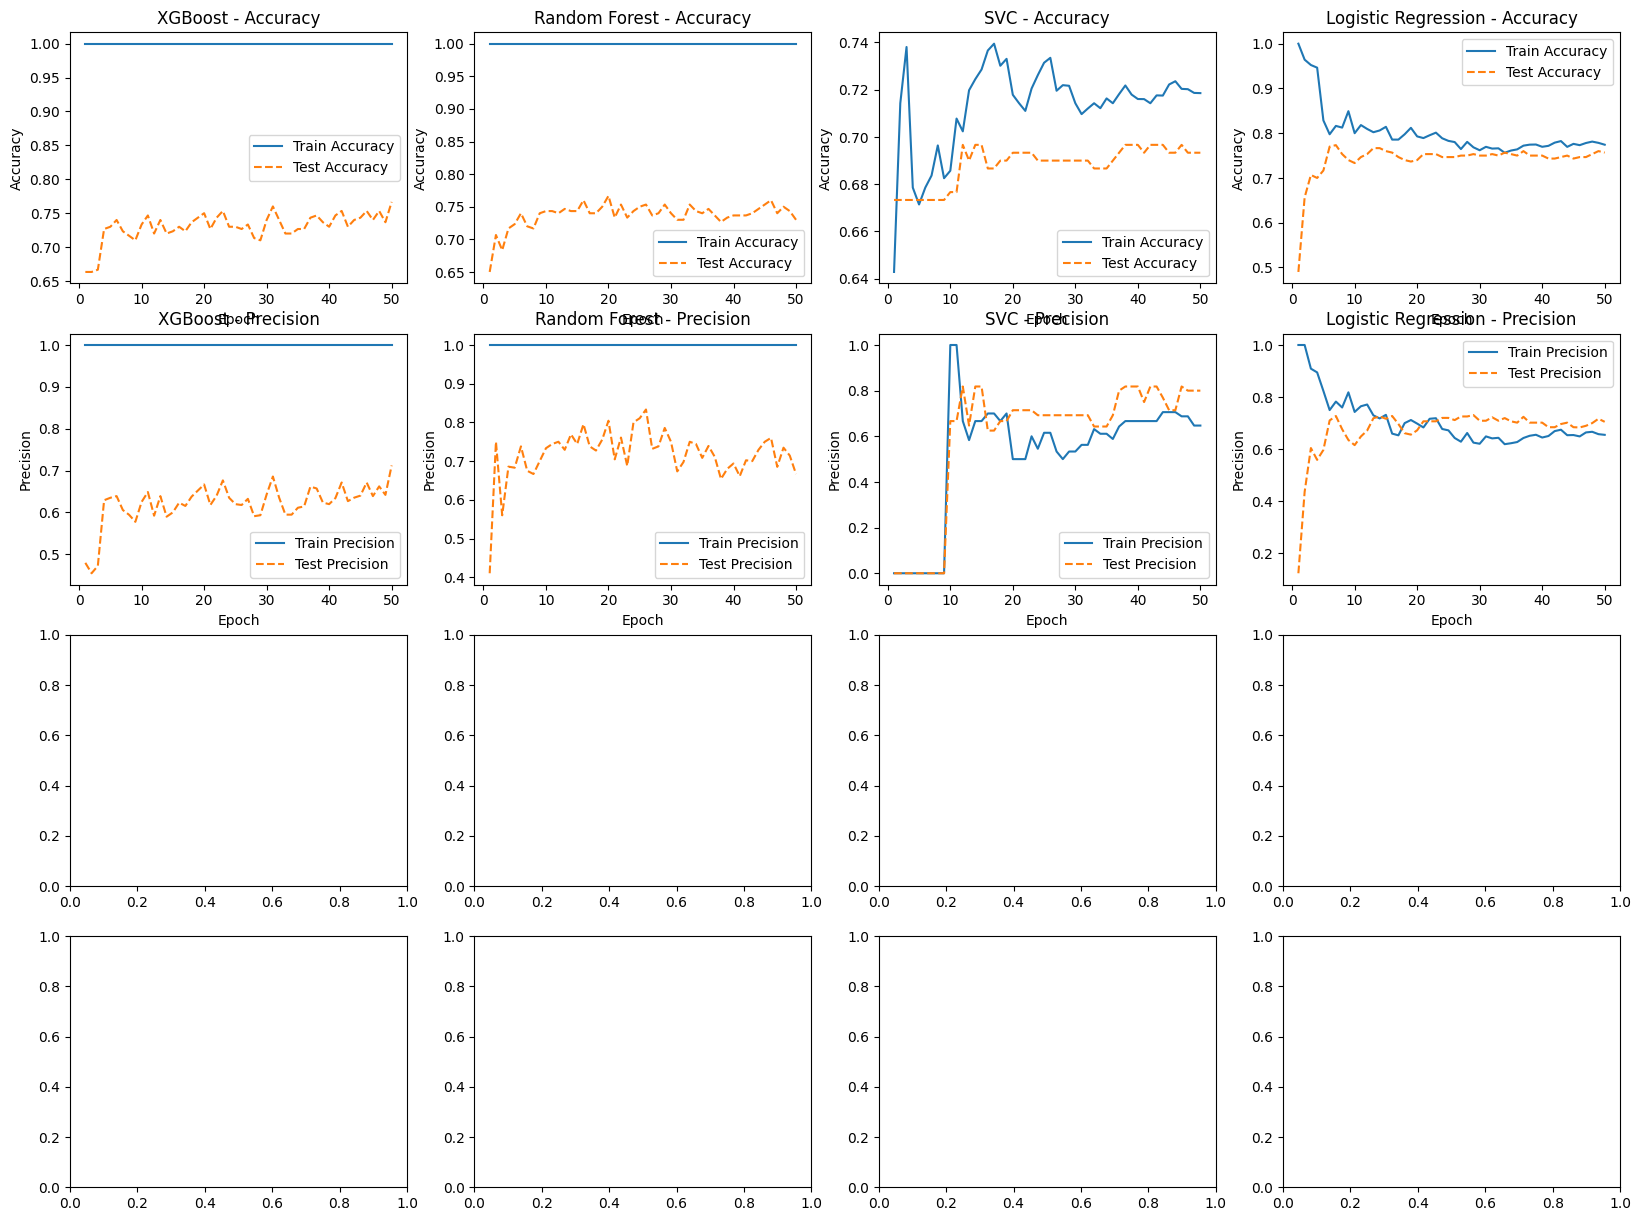

In [48]:
def plot_performance(performance, epochs=50):
    fig, axs = plt.subplots(4, len(performance), figsize=(20, 15))

    for idx, (name, metrics) in enumerate(performance.items()):
        # Accuracy plots
        axs[0, idx].plot(range(1, epochs + 1), metrics['train_accuracy'], label='Train Accuracy')
        axs[0, idx].plot(range(1, epochs + 1), metrics['test_accuracy'], label='Test Accuracy', linestyle='--')
        axs[0, idx].set_title(f'{name} - Accuracy')
        axs[0, idx].set_xlabel('Epoch')
        axs[0, idx].set_ylabel('Accuracy')
        axs[0, idx].legend()

        # Precision plots
        axs[1, idx].plot(range(1, epochs + 1), metrics['train_precision'], label='Train Precision')
        axs[1, idx].plot(range(1, epochs + 1), metrics['test_precision'], label='Test Precision', linestyle='--')
        axs[1, idx].set_title(f'{name} - Precision')
        axs[1, idx].set_xlabel('Epoch')
        axs[1, idx].set_ylabel('Precision')
        axs[1, idx].legend()

    #plt.tight_layout()
    plt.show()

plot_performance(performance, epochs=50)